# **Machine Learning Practice Project: SuperKart**

--------------------
## **Context:**
--------------------

A sales forecast is a prediction of future sales revenue based on historical data, industry trends, and the status of the current sales pipeline. Businesses use the sales forecast to estimate weekly, monthly, quarterly, and annual sales totals. It is extremely important for a company to make an accurate sales forecast as it adds value across an organization and helps the different verticals to chalk out their future course of action. Forecasting helps an organization plan its sales operations by region and provides valuable insights to the supply chain team regarding the procurement of goods and materials. 
An accurate sales forecast process has many benefits which include improved decision-making about the future and reduction of sales pipeline and forecast risks. Moreover, it helps to reduce the time spent in planning territory coverage and establish benchmarks that can be used to assess trends in the future.

---------------------------
## **Objective:**
----------------------------

SuperKart is an organization that owns a chain of supermarkets and food marts providing a wide range of products. They want to predict the future sales revenue of its different outlets so that they can strategize their sales operation across different tier cities and plan their inventory accordingly. To achieve this purpose, SuperKart has hired a data science firm, shared the sales records of its various outlets for the previous quarter, and asked the firm to come up with a suitable model to predict the total sales of the stores for the upcoming quarter.

---------------------------------
## **Data Description:**
---------------------------------

The data contains the different attributes of the various products and stores. The detailed data dictionary is given below.

* Product_Id - unique identifier of each product, each identifier having two letters at the beginning followed by a number.
* Product_Weight - the weight of each product
* Product_Sugar_Content - sugar content of each product like low sugar, regular, and no sugar
* Product_Allocated_Area - the ratio of the allocated display area of each product to the total display area of all the products in a store
* Product_Type - broad category for each product like meat, snack foods, hard drinks, dairy, canned, soft drinks, health and hygiene, baking goods, bread, breakfast, frozen foods, fruits and vegetables, household, seafood, starchy foods, others
* Product_MRP - maximum retail price of each product
* Store_Id - unique identifier of each store
* Store_Establishment_Year - the year in which the store was established
* Store_Size - the size of the store depending on sq. feet like high, medium, and low
* Store_Location_City_Type - the type of city in which the store is located like Tier 1, Tier 2, and Tier 3. Tier 1 consists of cities where the standard of living is comparatively higher than its Tier 2 and Tier 3 counterparts.
* Store_Type - the type of store depending on the products that are being sold there like Departmental Store, Supermarket Type 1, Supermarket Type 2, and Food Mart
* Product_Store_Sales_Total - total revenue generated by the sale of that particular product in that particular store


## **Importing the necessary libraries and overview of the dataset**

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)

# Import libraries for building linear regression model
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Import library for preparing data
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

### **Importing the Dataset**

In [2]:
kart = pd.read_csv("Superkart.csv")

In [3]:
# Copying data to another variable to avoid any changes to original data
data = kart.copy()

### **View the first and last 5 rows of the dataset**

In [4]:
# Check the head of the data
print(data.head())


  Product_Id  Product_Weight Product_Sugar_Content  Product_Allocated_Area  \
0     FD6114           12.66             Low Sugar                   0.027   
1     FD7839           16.54             Low Sugar                   0.144   
2     FD5075           14.28               Regular                   0.031   
3     FD8233           12.10             Low Sugar                   0.112   
4     NC1180            9.57              No Sugar                   0.010   

         Product_Type  Product_MRP Store_Id  Store_Establishment_Year  \
0        Frozen Foods       117.08   OUT004                      2009   
1               Dairy       171.43   OUT003                      1999   
2              Canned       162.08   OUT001                      1987   
3        Baking Goods       186.31   OUT001                      1987   
4  Health and Hygiene       123.67   OUT002                      1998   

  Store_Size Store_Location_City_Type          Store_Type  \
0     Medium                   

In [5]:
# Check the tail of the data
print(data.tail())

     Product_Id  Product_Weight Product_Sugar_Content  Product_Allocated_Area  \
8758     NC7546           14.80              No Sugar                   0.016   
8759      NC584           14.06              No Sugar                   0.142   
8760     NC2471           13.48              No Sugar                   0.017   
8761     NC7187           13.89              No Sugar                   0.193   
8762      FD306           14.73             Low Sugar                   0.177   

            Product_Type  Product_MRP Store_Id  Store_Establishment_Year  \
8758  Health and Hygiene       140.53   OUT004                      2009   
8759           Household       144.51   OUT004                      2009   
8760  Health and Hygiene        88.58   OUT001                      1987   
8761           Household       168.44   OUT001                      1987   
8762         Snack Foods       224.93   OUT002                      1998   

     Store_Size Store_Location_City_Type         Store_T

### **Understand the shape of the dataset**

In [6]:
# Check the shape of the data
print(data.shape)

(8763, 12)


### **Check the data types of the columns for the dataset**

In [7]:
# Check for information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Product_Id                 8763 non-null   object 
 1   Product_Weight             8763 non-null   float64
 2   Product_Sugar_Content      8763 non-null   object 
 3   Product_Allocated_Area     8763 non-null   float64
 4   Product_Type               8763 non-null   object 
 5   Product_MRP                8763 non-null   float64
 6   Store_Id                   8763 non-null   object 
 7   Store_Establishment_Year   8763 non-null   int64  
 8   Store_Size                 8763 non-null   object 
 9   Store_Location_City_Type   8763 non-null   object 
 10  Store_Type                 8763 non-null   object 
 11  Product_Store_Sales_Total  8763 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 821.7+ KB


**Observations:__**

### **Checking for missing values in the dataset** ###

In [8]:
# Check for missing values in the data
data.isnull().sum()

Product_Id                   0
Product_Weight               0
Product_Sugar_Content        0
Product_Allocated_Area       0
Product_Type                 0
Product_MRP                  0
Store_Id                     0
Store_Establishment_Year     0
Store_Size                   0
Store_Location_City_Type     0
Store_Type                   0
Product_Store_Sales_Total    0
dtype: int64

**Observations:__**

In [9]:
# Check for duplicate values
data.duplicated().sum()

0

## **Exploratory Data Analysis**

#### Let's check the statistical summary of the data

In [10]:
data.describe(include= "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product_Id,8763,8763,FD875,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Weight,8763.0,NaN,NaN,NaN,12.653792,2.21732,4.0,11.15,12.66,14.18,22.0
Product_Sugar_Content,8763,4,Low Sugar,4885,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Allocated_Area,8763.0,NaN,NaN,NaN,0.068786,0.048204,0.004,0.031,0.056,0.096,0.298
Product_Type,8763,16,Fruits and Vegetables,1249,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_MRP,8763.0,NaN,NaN,NaN,147.032539,30.69411,31.0,126.16,146.74,167.585,266.0
Store_Id,8763,4,OUT004,4676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Establishment_Year,8763.0,NaN,NaN,NaN,2002.032751,8.388381,1987.0,1998.0,2009.0,2009.0,2009.0
Store_Size,8763,3,Medium,6025,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Location_City_Type,8763,3,Tier 2,6262,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observations:_____________**

#### Let's check the count of each unique category in each of the categorical variables

In [11]:
# Making a list of all categorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

FD875     1
FD1078    1
FD3162    1
FD1806    1
FD5490    1
         ..
FD6455    1
NC4854    1
NC596     1
FD3695    1
FD7680    1
Name: Product_Id, Length: 8763, dtype: int64
--------------------------------------------------
Low Sugar    4885
Regular      2251
No Sugar     1519
reg           108
Name: Product_Sugar_Content, dtype: int64
--------------------------------------------------
Fruits and Vegetables    1249
Snack Foods              1149
Frozen Foods              811
Dairy                     796
Household                 740
Baking Goods              716
Canned                    677
Health and Hygiene        628
Meat                      618
Soft Drinks               519
Breads                    200
Hard Drinks               186
Others                    151
Starchy Foods             141
Breakfast                 106
Seafood                    76
Name: Product_Type, dtype: int64
--------------------------------------------------
OUT004    4676
OUT001    1586
OUT003    134

**Observations:____________**

In [12]:
# Replacing reg category with Regular in Product_Sugar_Content feature

data.Product_Sugar_Content.replace(to_replace = ["reg"], value = ["Regular"], inplace = True)

In [13]:
# Print the value counts for each class in Product_Sugar_Content feature
data.Product_Sugar_Content.value_counts()

Low Sugar    4885
Regular      2359
No Sugar     1519
Name: Product_Sugar_Content, dtype: int64

**Observation:_________**

In [14]:
# Extracting the first two characters from the Product_Id column and storing it in another column
data["Product_Id_char"] = data["Product_Id"].str[:2]

data.head()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Product_Id_char
0,FD6114,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40,FD
1,FD7839,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02,FD
2,FD5075,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16,FD
3,FD8233,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18,FD
4,NC1180,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36,NC


In [15]:
data["Product_Id_char"].unique() # Fill the blank to get all unique elements in Product_Id_char

array(['FD', 'NC', 'DR'], dtype=object)

In [16]:
data.loc[data.Product_Id_char == "FD", "Product_Type"].unique() # Fill the blank to get all unique elements

array(['Frozen Foods', 'Dairy', 'Canned', 'Baking Goods', 'Snack Foods',
       'Meat', 'Fruits and Vegetables', 'Breads', 'Breakfast',
       'Starchy Foods', 'Seafood'], dtype=object)

In [17]:
data.loc[data.Product_Id_char == "DR", "Product_Type"].unique() # Fill the blank to get all unique elements

array(['Hard Drinks', 'Soft Drinks'], dtype=object)

In [18]:
data.loc[data.Product_Id_char == "NC", "Product_Type"].unique() # Fill the blank to get all unique elements

array(['Health and Hygiene', 'Household', 'Others'], dtype=object)

#### The Product_Id column will not add any value to our analysis so let's drop it before we move forward

In [19]:
## Drop the Product_Id column. Hint: use inplace = True and axis = 1

In [20]:
data = data.drop(["Product_Id"], axis = 1)

## **Univariate Analysis**

In [21]:
# Function to plot a boxplot and a histogram along the same scale


def histogram_boxplot(data, feature, figsize = (12, 7), kde = False, bins = None):
    
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12, 7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,  # Number of rows of the subplot grid= 2
        sharex = True,  # X-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )  # Creating the 2 subplots
    sns.boxplot(
        data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet"
    )  # Boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color = "black", linestyle = "-"
    )  # Add median to the histogram

**Product_Weight**

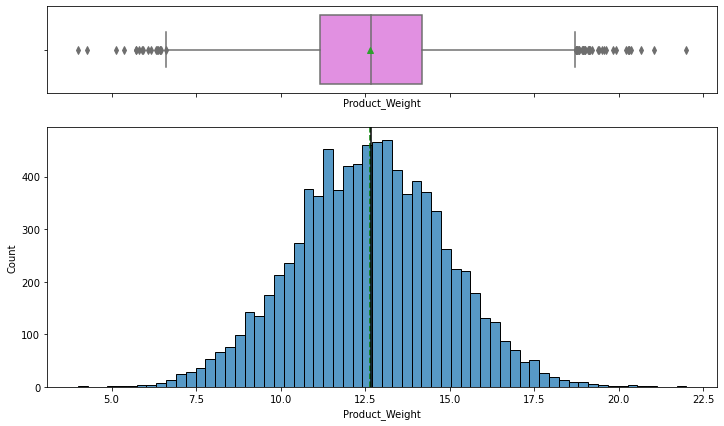

In [22]:
histogram_boxplot(data, "Product_Weight")

**Observation:__**

**Product_Allocated_Area**

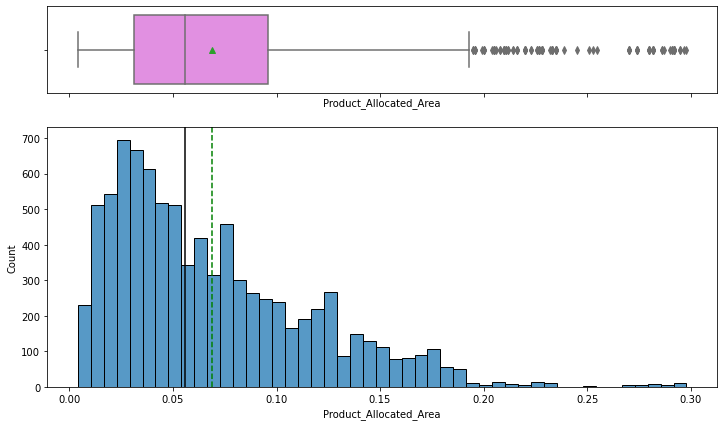

In [23]:
# Plot the histogram and the boxplot for 'Product_Allocated_Area'
histogram_boxplot(data, "Product_Allocated_Area")

**Observation:__**

**Product_MRP**

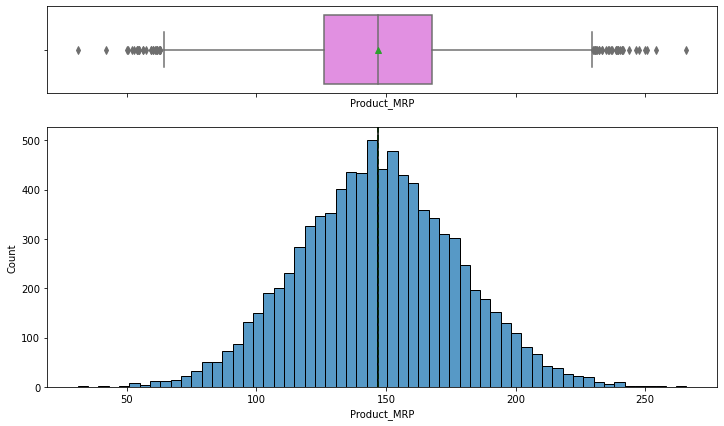

In [24]:
# Plot the histogram and the boxplot for 'Product_MRP'
histogram_boxplot(data, "Product_MRP")

**Observation:__**

**Product_Store_Sales_Total**

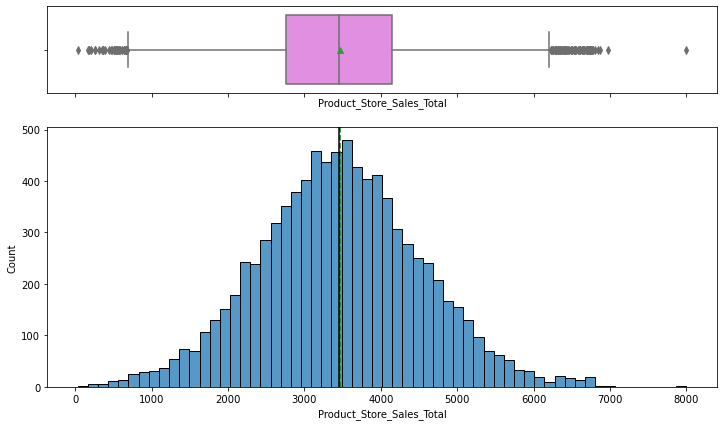

In [25]:
# Plot the histogram and the boxplot for 'Product_Store_Sales_Total'
histogram_boxplot(data, "Product_Store_Sales_Total")

**Observation:__**

In [26]:
# Function to create labeled barplots


def labeled_barplot(data, feature, perc = False, n = None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # Length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize = (count + 1, 5))
    else:
        plt.figure(figsize = (n + 1, 5))

    plt.xticks(rotation = 90, fontsize = 15)
    ax = sns.countplot(
        data = data,
        x = feature,
        palette = "Paired",
        order = data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # Percentage of each class of the category
        else:
            label = p.get_height()  # Count of each level of the category

        x = p.get_x() + p.get_width() / 2  # Width of the plot
        y = p.get_height()  # Height of the plot

        ax.annotate(
            label,
            (x, y),
            ha = "center",
            va = "center",
            size = 12,
            xytext = (0, 5),
            textcoords = "offset points",
        )  # Annotate the percentage

    plt.show()  # Show the plot

**Product_Sugar_Content**

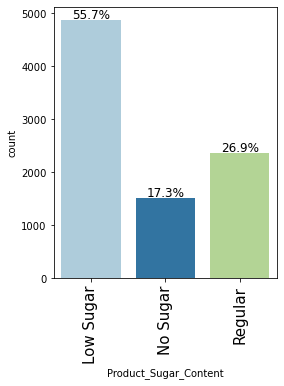

In [27]:
labeled_barplot(data, "Product_Sugar_Content", perc = True) # Plot for Product_Sugar_Content

**Observations:__**


**Product_Type**

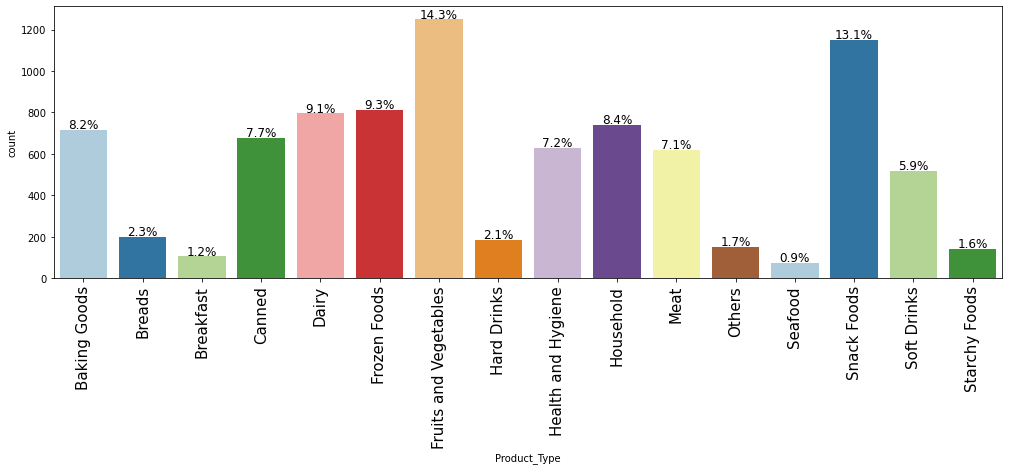

In [28]:
# Plot the labelled barplot for 'Product_Type'
labeled_barplot(data, "Product_Type", perc=True)

**Observations:__**

**Store_Id**

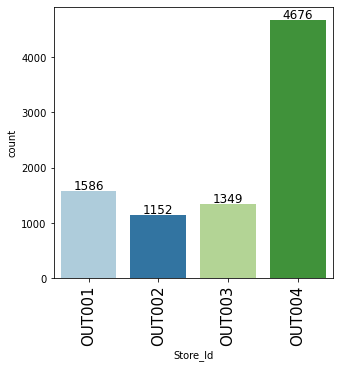

In [29]:
# Plot the labelled barplot for 'Store_Id'
labeled_barplot(data, "Store_Id")

**Observations:__**

**Store_Size**

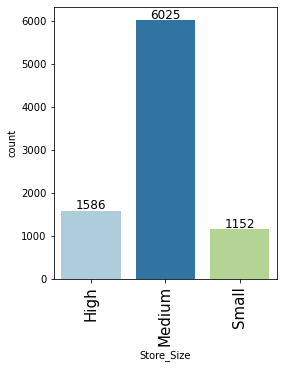

In [30]:
# Plot the labelled barplot for 'Store_Size'
labeled_barplot(data, "Store_Size")

**Observations:__**

**Store_Location_City_Type**

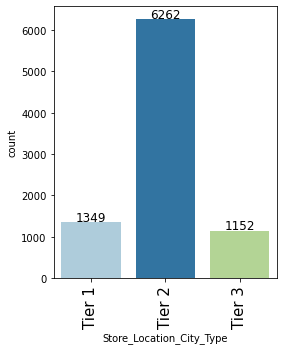

In [31]:
# Plot the labelled barplot for 'Store_Locatiom_City_Type'
labeled_barplot(data, "Store_Location_City_Type")

**Observations:__**

**Store_Type**

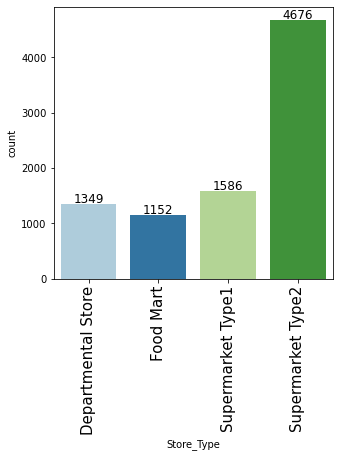

In [32]:
# Plot the labelled barplot for 'Store_Type'
labeled_barplot(data, "Store_Type")

**Observations:__**

### **Bivariate Analysis**

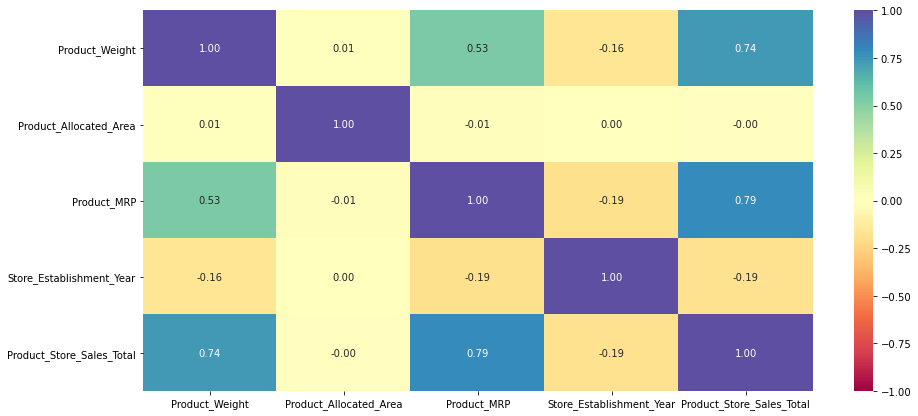

In [33]:
# Correlation check
cols_list = data.select_dtypes(include = np.number).columns.tolist()

plt.figure(figsize = (15, 7))

sns.heatmap(
    data[cols_list].corr(), annot = True, vmin = -1, vmax = 1, fmt = ".2f", cmap = "Spectral"
)

plt.show()

**Let's check the distribution of our target variable i.e Product_Store_Sales_Total with the numeric columns**

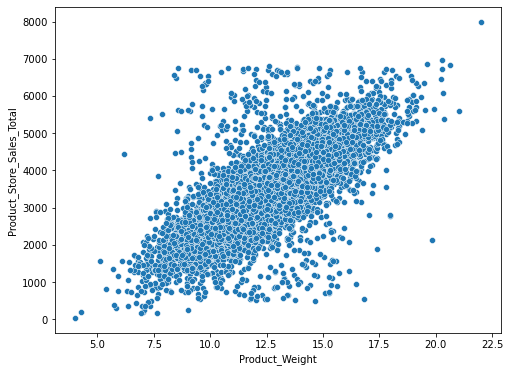

In [34]:
plt.figure(figsize = [8, 6])

sns.scatterplot(x = data.Product_Weight, y = data.Product_Store_Sales_Total)

plt.show()

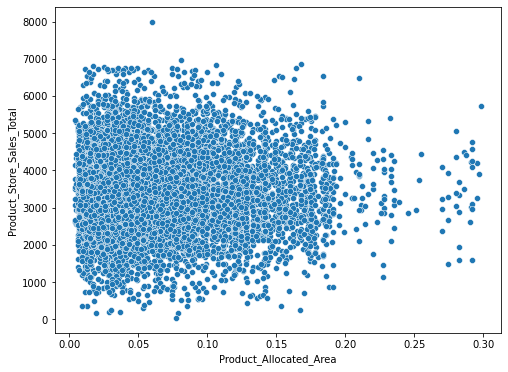

In [35]:
# Plot the scatterplot of Product_Allocated_Area against Product_Store_Sales_Total 
plt.figure(figsize = [8, 6])
sns.scatterplot(x = data.Product_Allocated_Area, y = data.Product_Store_Sales_Total)
plt.show()

**Observations:__**

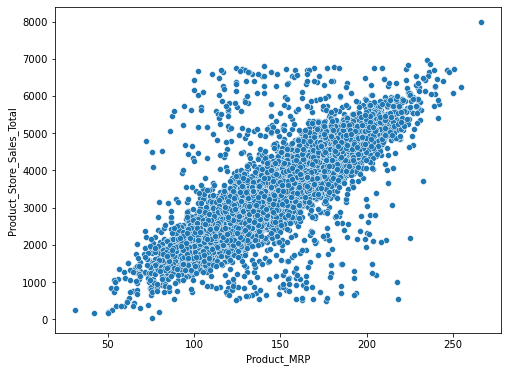

In [36]:
# Plot the scatterplot of Product_MRP against Product_Store_Sales_Total 
plt.figure(figsize = [8, 6])
sns.scatterplot(x=data.Product_MRP, y=data.Product_Store_Sales_Total)
plt.show()

**Observations:__**

**Let us see from which product type the company is generating most of the revenue**

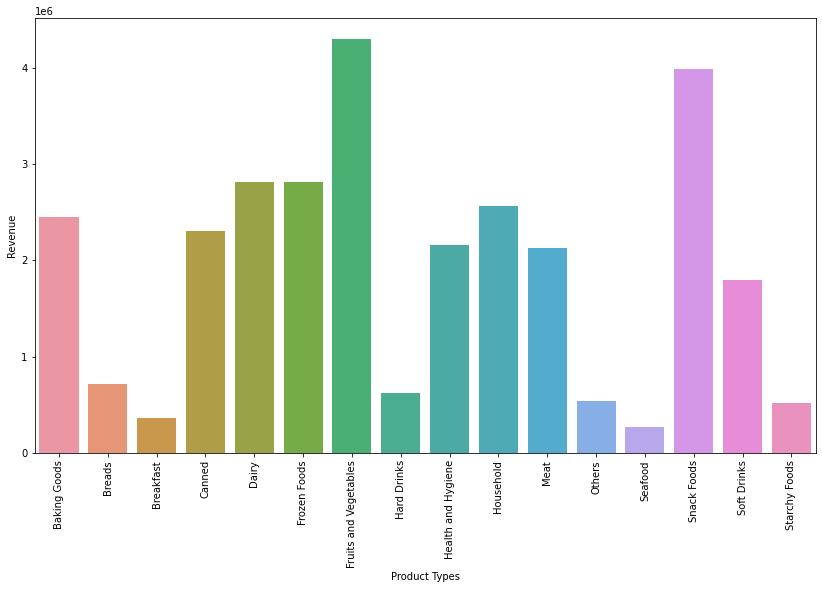

In [37]:
df_revenue1 = data.groupby(["Product_Type"], as_index = False)[
    "Product_Store_Sales_Total"
].sum()

plt.figure(figsize = [14, 8])

plt.xticks(rotation = 90)

a = sns.barplot(x = df_revenue1.Product_Type, y = df_revenue1.Product_Store_Sales_Total)

a.set_xlabel("Product Types")

a.set_ylabel("Revenue")

plt.show()

**Product_Sugar_Content**

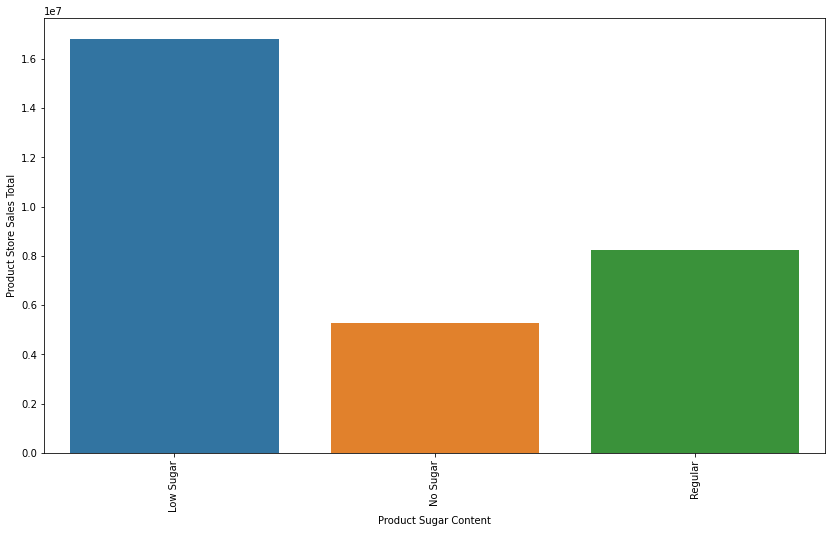

In [38]:
# Plot the barplot to see how much Product_Sugar_Content is generating the revenue
df_revenue2 = data.groupby(["Product_Sugar_Content"], as_index = False)["Product_Store_Sales_Total"].sum()

plt.figure(figsize = [14, 8])
plt.xticks(rotation = 90)

a = sns.barplot(x = df_revenue2.Product_Sugar_Content, y = df_revenue2.Product_Store_Sales_Total)

a.set_xlabel("Product Sugar Content")
a.set_ylabel("Product Store Sales Total")

plt.show()

**Observations:__**

**Let us see from which type of stores and locations the revenue generation is more**

**Store_Id**

Text(0, 0.5, 'Product Store Sales Total')

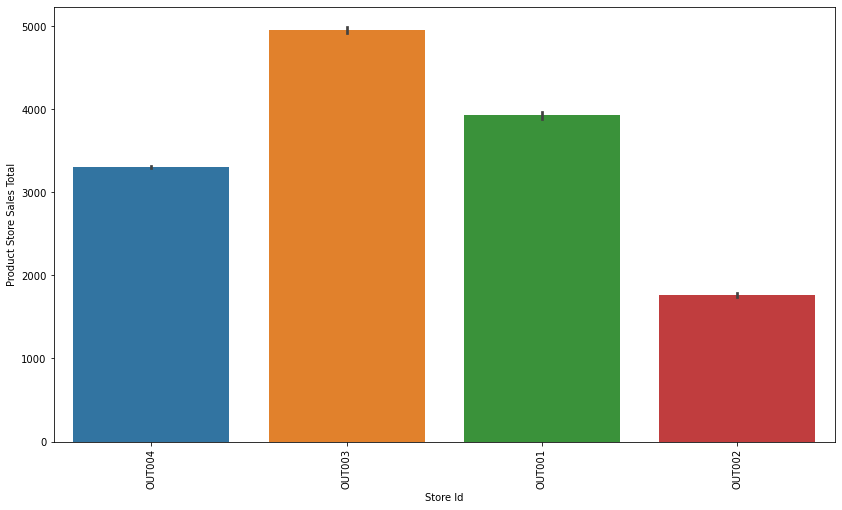

In [39]:
# Plot the barplot to see how much Store_Id is generating the revenue
df_revenue3 = data.groupby(["Store_Id"], as_index = False)["Product_Store_Sales_Total"].sum()

plt.figure(figsize = [14, 8])
plt.xticks(rotation=90)

a = sns.barplot(x = data.Store_Id, y = data.Product_Store_Sales_Total)

a.set_xlabel("Store Id")
a.set_ylabel("Product Store Sales Total")

**Observations:__**

**Store_Size**

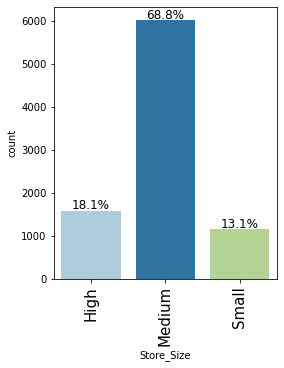

In [40]:
# Plot the barplot to see how much Store_Size is generating the revenue
labeled_barplot(data, "Store_Size", perc = True)

**Observations:__**

**Store_Location_City_Type**

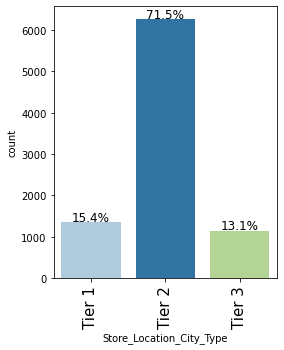

In [41]:
# Plot the barplot to see how much Store_Location_City_Type is generating the revenue
labeled_barplot(data, "Store_Location_City_Type", perc = True)

**Observations:__**

**Store_Type**

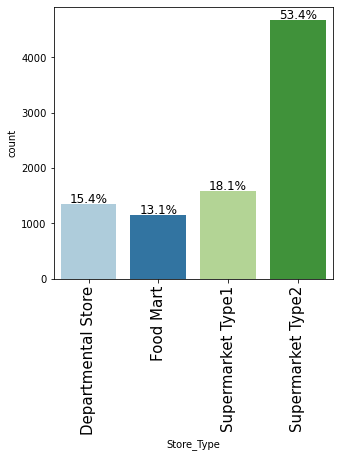

In [42]:
# Plot the barplot to see how much Store_Type is generating the revenue
labeled_barplot(data, "Store_Type", perc = True)

**Observations:__**

**Let's check the distribution of our target variable i.e Product_Store_Sales_Total with the other categorical columns**

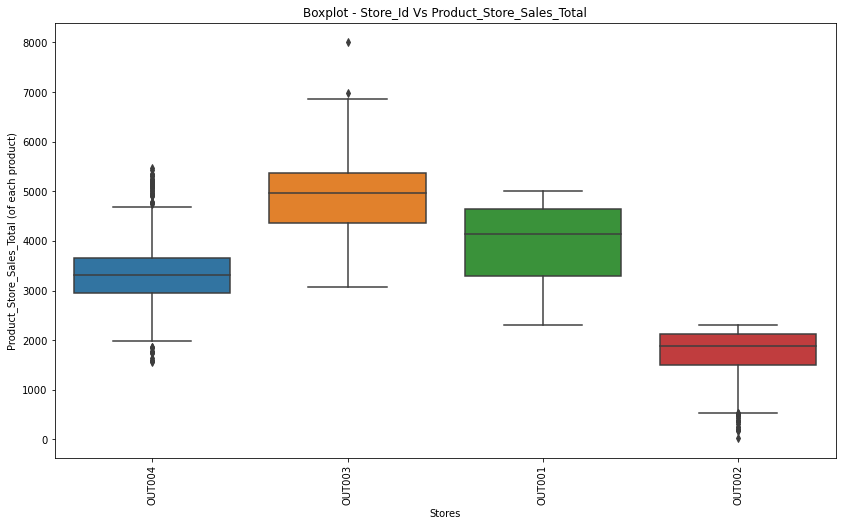

In [43]:
plt.figure(figsize = [14, 8])

sns.boxplot(data.Store_Id, data.Product_Store_Sales_Total)

plt.xticks(rotation = 90)

plt.title("Boxplot - Store_Id Vs Product_Store_Sales_Total")

plt.xlabel("Stores")

plt.ylabel("Product_Store_Sales_Total (of each product)")

plt.show()

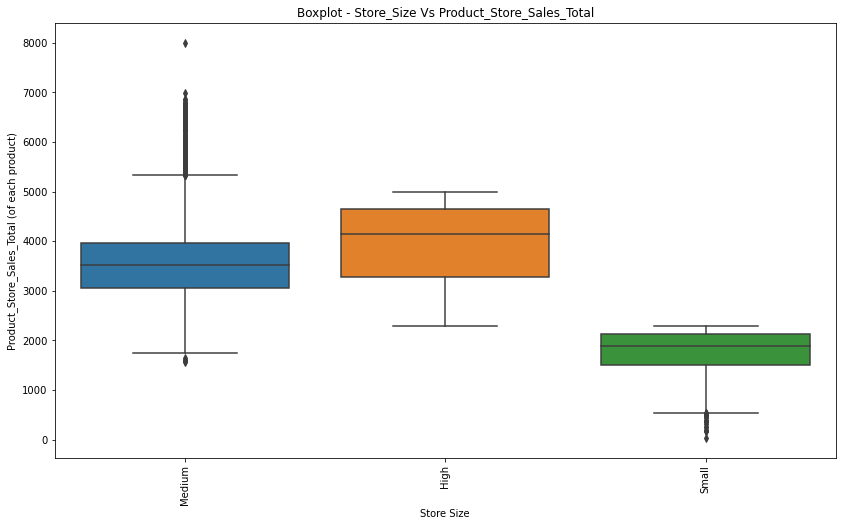

In [44]:
# Plot the boxplot of Store size against Product_Store_Sales_Total 
plt.figure(figsize = [14, 8])

sns.boxplot(data.Store_Size, data.Product_Store_Sales_Total)

plt.xticks(rotation = 90)

plt.title("Boxplot - Store_Size Vs Product_Store_Sales_Total")

plt.xlabel("Store Size")

plt.ylabel("Product_Store_Sales_Total (of each product)")

plt.show()

**Let's now try to find out some relationship between the other columns**

**Generally certain product types will have higher product weight than others. Let's have a look**

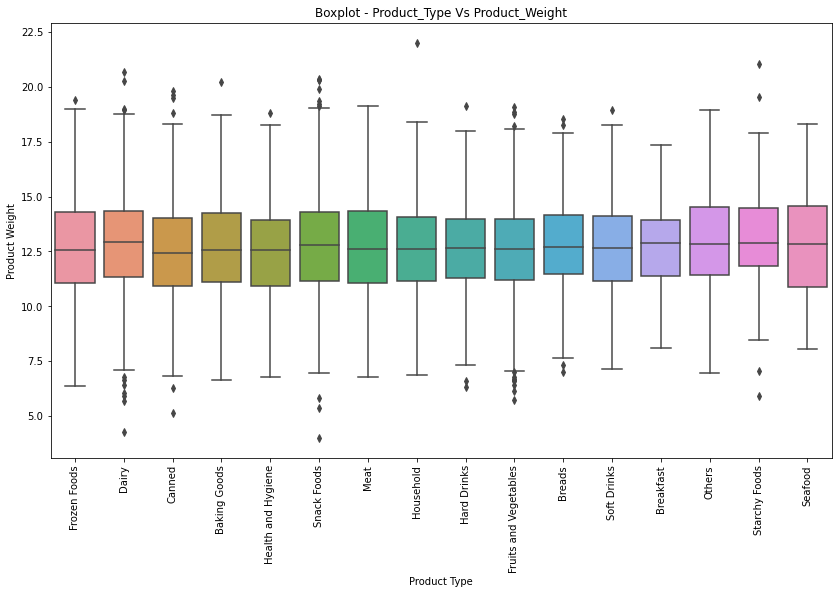

In [45]:
# Plot the boxplot of Product_Type against Product_Weight 
plt.figure(figsize = [14, 8])

sns.boxplot(data.Product_Type, data.Product_Weight)

plt.xticks(rotation = 90)

plt.title("Boxplot - Product_Type Vs Product_Weight")

plt.xlabel("Product Type")

plt.ylabel("Product Weight")

plt.show()

**Observations:__**

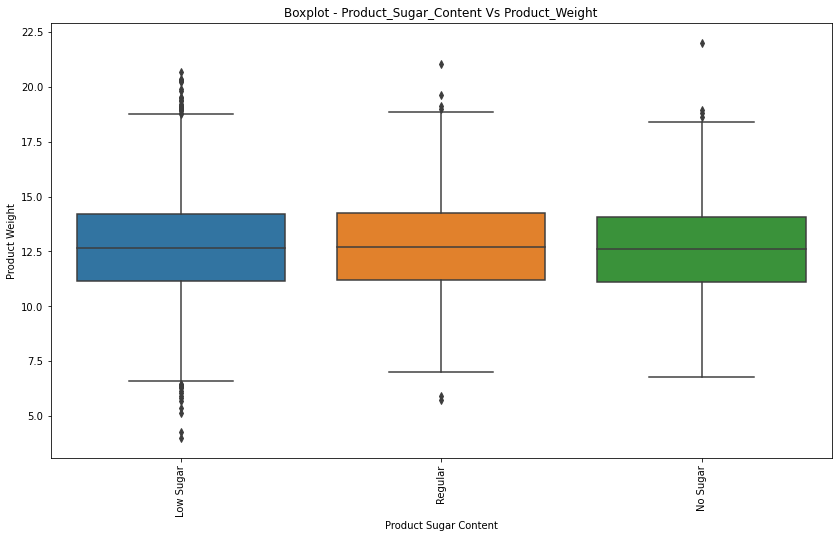

In [46]:
# Plot the box plot of Product_Sugar_Content against Product_Weight 
plt.figure(figsize = [14, 8])

sns.boxplot(data.Product_Sugar_Content, data.Product_Weight)

plt.xticks(rotation = 90)

plt.title("Boxplot - Product_Sugar_Content Vs Product_Weight")

plt.xlabel("Product Sugar Content")

plt.ylabel("Product Weight")

plt.show()

**Observations:__**

**Let's find out whether there is some relationship between the weight of the product and its sugar content**

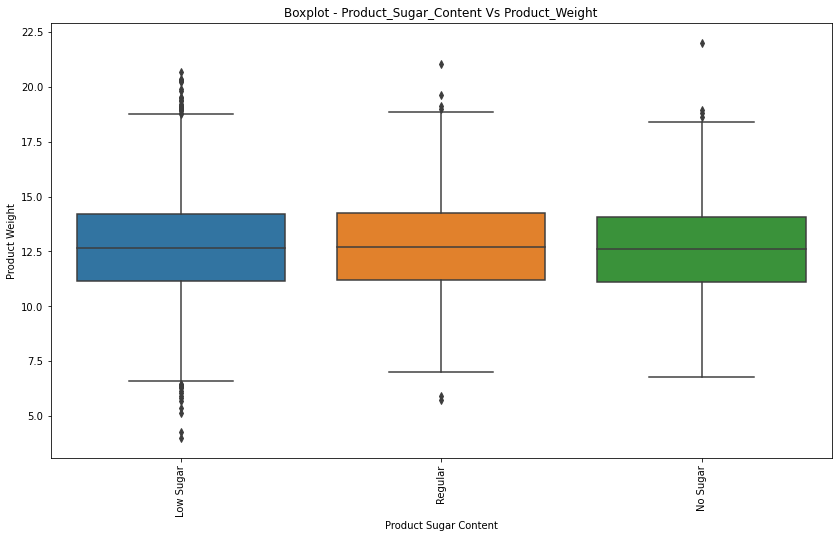

In [47]:
# Plot a box plot of Product_Sugar_Content against Product_Weight 
plt.figure(figsize = [14, 8])

sns.boxplot(data.Product_Sugar_Content, data.Product_Weight)

plt.xticks(rotation = 90)

plt.title("Boxplot - Product_Sugar_Content Vs Product_Weight")

plt.xlabel("Product Sugar Content")

plt.ylabel("Product Weight")

plt.show()

**Observations:__**

**Let's analyze the sugar content of different product types**

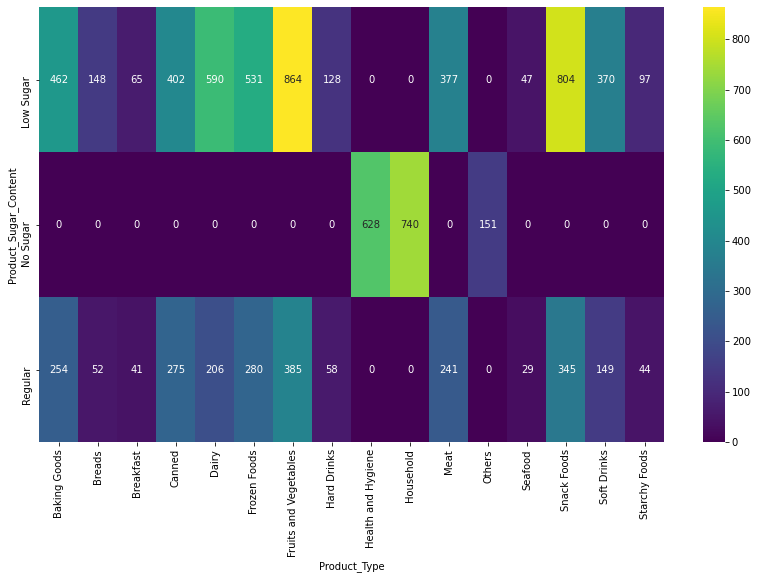

In [48]:
plt.figure(figsize = (14, 8))

sns.heatmap(
    pd.crosstab(data["Product_Sugar_Content"], data["Product_Type"]),
    annot=True,
    fmt = "g",
    cmap = "viridis",
)

plt.ylabel("Product_Sugar_Content")
plt.xlabel("Product_Type")
plt.show()

#### Let's find out how many items of each product type has been sold in each of the stores

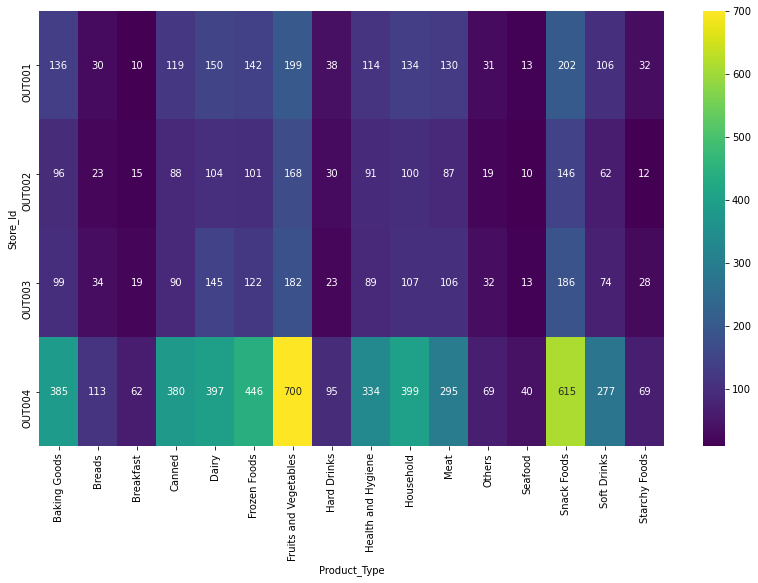

In [49]:
# Plot heatmap with and Product_Type as x and Store_Ids as y
plt.figure(figsize = (14, 8))

sns.heatmap(
    pd.crosstab(data["Store_Id"], data["Product_Type"]),
    annot=True,
    fmt = "g",
    cmap = "viridis",
)

plt.ylabel("Store_Id")
plt.xlabel("Product_Type")
plt.show()

**Observations:__**

#### Different product types have different prices. Let's analyze the trend

In [ ]:
# Plot a box plot of Product_Type against Product_MRP
plt.figure(figsize = (14, 8))

sns.heatmap(
    pd.crosstab(data["Product_MRP"], data["Product_Type"]),
    annot=True,
    fmt = "g",
    cmap = "viridis",
)

plt.ylabel("Product_Sugar_Content")
plt.xlabel("Product_Type")
plt.show()

**Observations:__**

#### Let's find out how the Product_MRP varies with the different stores

In [ ]:
# Plot a box plot of box plot of Store_Id against Product_MRP
plt.figure(figsize = (14, 8))

sns.heatmap(
    pd.crosstab(data["Store_Id"], data["Product_MRP"]),
    annot = True,
    fmt = "g",
    cmap = "viridis"
)
plt.ylabel("Store_ID")
plt.xlabel("Product_MRP")
plt.show()

**Observations:__**

**Let's delve deeper and do a detailed analysis of each of the stores**

**OUT001**

In [ ]:
data.loc[data["Store_Id"] == "OUT001"].describe(include = "all").T 

In [ ]:
data.loc[data["Store_Id"] == "OUT001", "Product_Store_Sales_Total"].sum()

In [ ]:
df_OUT001 = (
    data.loc[data["Store_Id"] == "OUT001"]
    .groupby(["Product_Type"], as_index = False)["Product_Store_Sales_Total"]
    .sum()
)

In [ ]:
plt.figure(figsize = [14, 8])
plt.xticks(rotation = 90)
plt.xlabel("Product_Type")
plt.ylabel("Product_Store_Sales_Total")
plt.title("OUT001")
sns.barplot(x = df_OUT001.Product_Type, y = df_OUT001.Product_Store_Sales_Total)
plt.show()

**Observations:__**

**OUT002**

In [ ]:
# Print the statistical summary where Store_Id is OUT002
data.loc[data["Store_Id"] == "OUT002"].describe(include = "all").T

In [ ]:
# Print the total revenue from the OUT002 Store_Id 
data.loc[data["Store_Id"] == "OUT002", "Product_Store_Sales_Total"].sum()

In [ ]:
df_OUT002 = (
    data.loc[data["Store_Id"] == "OUT002"]
    .groupby(["Product_Type"], as_index = False)["Product_Store_Sales_Total"].sum()
)

plt.figure(figsize = [14, 8])
plt.xticks(rotation = 90)
plt.xlabel("Product_Type")
plt.ylabel("Product_Store_Sales_Total")
plt.title("OUT002")
sns.barplot(x = df_OUT002.Product_Type, y = df_OUT002.Product_Store_Sales_Total)
plt.show()

In [ ]:
# Plot the barplot for Product_Type from df_OUT002 against Product_Store_Sales_Total

**Observations:__**

**OUT003**

In [ ]:
# Print the statistical summary where Store_Id is OUT003
data.loc[data["Store_Id"] == "OUT002"].describe(include = "all").T

In [ ]:
# Print the total revenue from the OUT003 Store_Id 
data.loc[data["Store_Id"] == "OUT003", "Product_Store_Sales_Total"].sum()

In [ ]:
df_OUT003 = (
    data.loc[data["Store_Id"] == "OUT003"]
    .groupby(["Product_Type"], as_index = False)["Product_Store_Sales_Total"]
    .sum()
)

plt.figure(figsize = [14, 8])
plt.xticks(rotation = 90)
plt.xlabel("Product Type")
plt.ylabel("Product Store Sales Total")
plt.title("OUT003")
sns.barplot(x = df_OUT003.Product_Type, y = df_OUT003.Product_Store_Sales_Total)
plt.show()

In [ ]:
# Plot the barplot for Product_Type from df_OUT003 against Product_Store_Sales_Total

**Observations:__**

**OUT004**

In [ ]:
# Print the statistical summary where Store_Id is OUT004
data.loc[data["Store_Id"] == "OUT004"].describe(include = "all")

In [ ]:
# Print the total revenue from the OUT004 Store_Id 
data.loc[data["Store_Id"] == "OUT004", "Product_Store_Sales_Total"].sum()

In [ ]:
df_OUT004 = (
    data.loc[data.Store_Id == "OUT004"]
    .groupby(["Product_Type"], as_index = False)["Product_Store_Sales_Total"]
    .sum()
)

plt.figure(figsize = [14, 8])
plt.xticks(rotation = 90)
plt.xlabel("Product Type")
plt.ylabel("Product Store Sales Total")
plt.title("OUT004 Total Sales by Product Type")
sns.barplot(x = df_OUT004.Product_Type, y=df_OUT004.Product_Store_Sales_Total)
plt.show()

In [ ]:
# Plot the barplot for Product_Type from df_OUT004 against Product_Store_Sales_Total

**Observations:__**

#### Let's find out the revenue generated by the stores from each of the product types

In [ ]:
df1 = data.groupby(["Product_Type", "Store_Id"], as_index = False)[
    "Product_Store_Sales_Total"
].sum()


df1

**Observations:_____**

#### Let's find out the revenue generated by the stores from products having different levels of sugar content

In [ ]:
df2 = data.groupby(["Product_Type", "Store_Id"], as_index = False)[
    "Product_Store_Sales_Total"
].sum()

df2


**Observations:____**

## **Data Preprocessing**

### **Feature Engineering**

**A store which has been in the business for a long duration is more trustworthy than the newly established ones. On the other hand, older stores may sometimes lack infrastructure if proper attention is not given. So let us calculate the current age of the store and incorporate that in our model.(The data of the sales records was collected in 2021, so we will use 2021 as the base year to calculate the store age)**

In [ ]:
# Outlet Age
data["Store_Age_Years"] = 2022 - data.Store_Establishment_Year # Fill in the blank and use Store_Establishment_Year to extract the present store age

**We have 16 different product types in our dataset. So let us make two broad categories, perishables and non perishables, in order to reduce the number of product types.**

In [ ]:
perishables = [
    "Dairy",
    "Meat",
    "Fruits and Vegetables",
    "Breakfast",
    "Breads",
    "Seafood",
]

In [ ]:
def change(x):
    if x in perishables:
        return "Perishables"
    else:
        return "Non Perishables"


data.Product_Type.apply(change)

In [ ]:
change1 = []
for i in range(0, len(data)):
    if data.Product_Type[i] in perishables:
        change1.append("Perishables")
    else:
        change1.append("Non Perishables")

In [ ]:
data["Product_Type_Category"] = pd.Series(change1) # Fill in the blank and use change1 to create a new column

In [ ]:
data.head()

### **Outlier Check**

- Let's check for outliers in the data.

In [ ]:
# Outlier detection using boxplot
numeric_columns = data.select_dtypes(include = np.number).columns.tolist()
numeric_columns.remove("Store_Establishment_Year")
numeric_columns.remove("Store_Age_Years")


plt.figure(figsize = (15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis = 1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observations:________**

In [ ]:
plt.figure(figsize = (16, 8))
sns.heatmap(data.corr(), annot = True)
plt.show()

**Observations:____**

### **Data Preparation for modeling**

- We want to forecast the Product_Store_Sales_Total. 
- Before we proceed to build a model, we'll have to encode categorical features and drop the unnecessary columns
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [ ]:
# Drop the "Product_Type", "Store_Id", "Store_Establishment_Year" variables from the data
data = data.drop(["Product_Type", "Store_Id", "Store_Establishment_Year"], axis = 1)

In [ ]:
# Apply get_dummies on the dataframe data
data = pd.get_dummies(
    data,
    columns = data.select_dtypes(include = ["object", "category"]).columns.tolist(),
    drop_first = True,
)

In [ ]:
# Separating features and the target column

X = data.drop(["Product_Store_Sales_Total"], axis = 1)
y = data["Product_Store_Sales_Total"]

In [ ]:
X = sm.add_constant(X)

In [ ]:
# Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.30, random_state = 1)

In [ ]:
X_train.shape, X_test.shape

### **Check for Multicollinearity**

We will use the Variance Inflation Factor (VIF), to check if there is multicollinearity in the data.

Features having a VIF score > 5 will be dropped / treated till all the features have a VIF score < 5

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # Calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


print(checking_vif(X_train))

**Observations:**
- The VIF of Product_Weight, Product_Allocation_Area, Product_MRP, Product_Id_char_FD are less.

In [ ]:
X_train = X_train.drop('Store_Age_Years',axis = 1)

X_test = X_test.drop('Store_Age_Years',axis = 1)

### **Check for Multicollinearity**

We will use the Variance Inflation Factor (VIF), to check if there is multicollinearity in the data.

Features having a VIF score > 5 will be dropped / treated till all the features have a VIF score < 5

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns # Store the train columns

    # Calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


print(checking_vif(X_train))

**Observations:__**

## **Building Models**

Let's create a function to calculate the performance metrics for our regression model so that we don't need to use the same code repeatedly. 

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_absolute_error, mean_squared_error

# Model Performance on test and train data
def model_pref(olsmodel, x_train, x_test):

    # Insample Prediction
    y_pred_train = olsmodel.predict(x_train)
    y_observed_train = y_train

    # Prediction on test data
    y_pred_test = olsmodel.predict(x_test)
    y_observed_test = y_test

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    np.sqrt(mean_squared_error(y_pred_train, y_observed_train)),
                    np.sqrt(mean_squared_error(y_pred_test, y_observed_test)),
                ],
                "MAE": [
                    mean_absolute_error(y_pred_train, y_observed_train),
                    mean_absolute_error(y_pred_test, y_observed_test),
                ],
                
                "r2": [
                    r2_score(y_pred_train, y_observed_train),
                    r2_score(y_pred_test, y_observed_test),
                ],
            }
        )
    )

In [ ]:
# Create the OLS model and fit it
model1 = sm.OLS(y_train, X_train).fit()


In [ ]:
# Get the model summary
model1.summary()

In [ ]:
# Checking model1 performance
model_pref(model1, X_train, X_test)

**Observations:____**

### **Drop insignificant variables (variables with p-value > 0.05) from the above model and create the regression model again.**

In [ ]:
X_train1 = X_train.drop(["Product_Type_Category_Perishables", "Product_Id_char_FD"], axis = 1) # Please drop the insiginificant variables from the X_train 


In [ ]:
X_test1 = X_test.drop(["Product_Type_Category_Perishables", "Product_Id_char_FD"], axis = 1) # Please drop the insiginificant variables from the X_test

In [ ]:
# Create the OLS model and fit it
model2 = sm.OLS(y_train, X_train1).fit()

In [ ]:
# Get the model summary
model2.summary()

In [ ]:
# Checking model2 performance
model_pref(model2, X_train1, X_test1)

**Observations:____**

### **Checking the below linear regression assumptions**

1. **Mean of residuals should be 0**
2. **No Heteroscedasticity**
3. **Linearity of variables**
4. **Normality of error terms**

### **1. Check for mean residuals**

In [ ]:
residuals = model2.resid

np.mean(residuals)

**Observations:____**

### **2. Check for homoscedasticity**

- Homoscedasticity - If the residuals are symmetrically distributed across the regression line, then the data is said to be homoscedastic.

- Heteroscedasticity- - If the residuals are not symmetrically distributed across the regression line, then the data is said to be heteroscedastic. In this case, the residuals can form a funnel shape or any other non-symmetrical shape.

- We'll use `Goldfeldquandt Test` to test the following hypothesis with alpha = 0.05:

    - Null hypothesis: Residuals are homoscedastic
    - Alternate hypothesis: Residuals have heteroscedastic

In [ ]:
from statsmodels.stats.diagnostic import het_white

from statsmodels.compat import lzip

import statsmodels.stats.api as sms

In [ ]:
name = ["F statistic", "p-value"]

test = sms.het_goldfeldquandt(y_train, X_train)

lzip(name, test)

**Observations:____**

### **3. Linearity of variables**

It states that the predictor variables must have a linear relation with the dependent variable.

To test the assumption, we'll plot residuals and the fitted values on a plot and ensure that residuals do not form a strong pattern. They should be randomly and uniformly scattered on the x-axis.

In [ ]:
# Predicted values
fitted = model2.fittedvalues

# sns.set_style("whitegrid")
sns.residplot(x = fitted, y = residuals, color = "lightblue", lowess = True)

plt.xlabel("Fitted Values")

plt.ylabel("Residual")

plt.title("Residual PLOT")

plt.show()

**Observations:_____**

### **4. Normality of error terms**

The residuals should be normally distributed.

In [ ]:
# Plot histogram of residuals
sns.histplot(residuals, kde=True)
# Write your code here

In [ ]:
# Plot q-q plot of residuals
import pylab

import scipy.stats as stats

stats.probplot(residuals, dist = "norm", plot = pylab)

plt.show()

**Observations:_____**

### **Apply cross validation to improve the model and evaluate it using different evaluation metrics**

Let's check the performance of the model using cross-validation technique from the scikit-learn library and see if the performance on the train and the test data is comparable to what we are getting after cross-validating the data. 

In [ ]:
# Import the required function

from sklearn.model_selection import cross_val_score

# Build the regression model and cross-validate
linearregression = LinearRegression()                                    

cv_Score11 = cross_val_score(linearregression, X_train, y_train, cv = 10)
cv_Score12 = cross_val_score(linearregression, X_train, y_train, cv = 10, 
                             scoring = 'neg_mean_squared_error')                                  


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))

**Observation:__________**

## **Actionable Insights and Business Recommendations**

___________________________________________________________________________